# [문제] 붓꽃 품종 데이터 활용
- 데이터를 이용해서 품종 분류하기

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris)
# 품종 : setosa, versicolor, virginica
# - sepal length : 꽃받침 길이
# - sepal width : 꽃받침 폭
# - petal length : 꽃잎 길이
# - petal width : 꽃잎 폭

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### 1) 데이터 전처리

##### 훈련/테스트데이터 생성

In [7]:
# 데이터형태 맞추기
iris_data = iris['data']
iris_target = iris['target']

In [197]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris_data, iris_target, stratify=iris_target, random_state=123)

##### 정규화(표준화) - 스케일 처리

In [208]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_data)

train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

### 2) 컬럼별데이터

In [127]:
sepal_length=[]
sepal_width=[]
petal_length=[]
petal_width=[]

for i in range(len(iris_data)) :
    sepal_length.append(iris_data[i][0])
    sepal_width.append(iris_data[i][1])
    petal_length.append(iris_data[i][2])
    petal_width.append(iris_data[i][3])

## k-최근접이웃(분류)

In [209]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_scalde, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9553571428571429
0.9473684210526315


In [ ]:
'''
훈련데이터의 정확도는 0.95로 높게 나타나 우수한 편이나,
테스트데이터의 정확도가 더 높게 나타남  >  과소적합 주의
'''

In [210]:
# k 개수 조정
kn2 = KNeighborsClassifier(n_neighbors=8)

kn2.fit(train_scalde, train_target)
print(kn2.score(train_scaled, train_target))
print(kn2.score(test_scaled, test_target))

0.9553571428571429
0.9473684210526315


In [212]:
np.column_stack((test_target[:5], kn2.predict(test_scaled[:5])))

array([[2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0]])

In [211]:
## 5개의 데이터 이웃 확인
# - 각 행마다 이웃이 3개씩
distances, indexes = kn2.kneighbors(train_scaled[:5])
print(indexes)
print('\n')
for test in test_scaled[:5] :
    distances, indexes = kn2.kneighbors([test])
    print(train_target[indexes])

[[  0  49   2  10  59  29  61  92]
 [  1  78  98   5  60 108  91  28]
 [  2  92   0  49  25  69 107   7]
 [  3  94  46  58  39  19  51 106]
 [  4  27  14  67  30  21  62  43]]


[[2 2 2 2 2 2 2 2]]
[[0 0 0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1]]
[[2 2 2 2 2 2 2 2]]
[[0 0 0 0 0 0 0 0]]


In [ ]:
'''
k = 7 , train score = 0.96 / test score = 0.97
이전보다 훈련정확도가 증가하였고,
훈련/테스트 정확도가 가까워진 것을 확인할 수 있으나 과소적합은 해결되지 않음

k = 8 , train score = 0.96 / test score = 0.95
이전보다 훈련정확도가 증가하였고,
훈련정확도가 테스트정확도보다 높게 나타나 과소적합은 해결되었으나 과대적합에 주의해야 함

과대적합보다 과소적합에 더 주의해야하므로
과소적합이 해결되는 k=8 모델을 선정할 수는 있으나 
로지스틱회귀분류 모델 정확도 확인 후 결정
'''

## 로지스틱 회귀 분류(다중)

In [45]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(train_scalde, train_target)

print(lg.score(train_scalde, train_target))
print(lg.score(test_scalde, test_target))

0.9553571428571429
0.9736842105263158


In [ ]:
'''
훈련데이터의 정확도는 0.96으로 높게 나타나 우수한 편이나, 
테스트데이터의 정확도가 더 높게 나타남  >  과소적합 주의
'''

In [67]:
# 규제강도 조절
lg2 = LogisticRegression(C=4)

lg2.fit(train_scalde, train_target)

print(lg2.score(train_scalde, train_target))
print(lg2.score(test_scalde, test_target))

0.9821428571428571
0.9736842105263158


In [ ]:
'''
C = 3 , train score = 0.9732 / test score = 0.9737
이전보다 훈련정확도가 증가하였고, 훈련/테스트 정확도가 가까워짐
0.005차이로 테스트정확도가 크게 나타남. 과소적합이 완전히 해결되진 않음

C = 4 , train score = 0.9821 / test score = 0.9737
이전보다 훈련정확도가 증가하였고,
훈련정확도가 테스트정확도보다 높게 나타나 과소적합은 해결되었으나 과대적합에 주의해야 함

과대적합보다 과소적합에 더 주의해야하므로
과소적합이 해결되는 C=4 모델 선정
'''

In [68]:
print(lg2.coef_)
print(lg2.intercept_)

[[-1.20930929  1.75947333 -2.52792012 -2.43225331]
 [ 0.91661713 -0.54055894 -0.96509686 -0.97774202]
 [ 0.29269216 -1.2189144   3.49301698  3.40999533]]
[-1.55655347e-03  2.74779472e+00 -2.74623817e+00]


## 로지스틱 회귀 분류(이진)

In [ ]:
# setosa, versicolor 품종만 가져와 이진 분류 진행

In [75]:
train_s_v = train_scalde[(train_target == 0) | (train_target == 1)]
train_s_v.shape

(75, 4)

In [76]:
target_s_v = train_target[(train_target == 0) | (train_target == 1)]
target_s_v.shape

(75,)

In [82]:
test_s_v = test_scalde[(test_target == 0) | (test_target == 1)]
print(test_s_v.shape)
t_target_s_v = test_target[(test_target == 0) | (test_target == 1)]
print(t_target_s_v.shape)

(25, 4)
(25,)


In [84]:
lg_sv = LogisticRegression()

lg_sv.fit(train_s_v, target_s_v)
print(lg_sv.score(train_s_v, target_s_v))
print(lg_sv.score(test_s_v, t_target_s_v))

1.0
1.0


In [144]:
print(t_target_s_v[:5])
print(lg_sv.predict(test_s_v[:5]))

[1 1 0 1 0]
[1 1 0 1 0]


In [146]:
print(lg_sv.coef_, lg_sv.intercept_)

[[ 0.90991601 -1.37427898  1.58316505  1.45967901]] [2.10597974]


In [ ]:
'''
<로지스틱회귀방정식>
z = 0.91*sepal_length -1.37*petal_length +1.58*sepal_width +1.46*petal_width +2.11
'''

## 컬럼별 상관관계 파악

In [136]:
import pandas as pd

In [139]:
sepal_length
petal_length
sepal_width
petal_width

[0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.3,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.1,
 0.1,
 0.2,
 0.4,
 0.4,
 0.3,
 0.3,
 0.3,
 0.2,
 0.4,
 0.2,
 0.5,
 0.2,
 0.2,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.1,
 0.2,
 0.2,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.3,
 0.3,
 0.2,
 0.6,
 0.4,
 0.3,
 0.2,
 0.2,
 0.2,
 0.2,
 1.4,
 1.5,
 1.5,
 1.3,
 1.5,
 1.3,
 1.6,
 1.0,
 1.3,
 1.4,
 1.0,
 1.5,
 1.0,
 1.4,
 1.3,
 1.4,
 1.5,
 1.0,
 1.5,
 1.1,
 1.8,
 1.3,
 1.5,
 1.2,
 1.3,
 1.4,
 1.4,
 1.7,
 1.5,
 1.0,
 1.1,
 1.0,
 1.2,
 1.6,
 1.5,
 1.6,
 1.5,
 1.3,
 1.3,
 1.3,
 1.2,
 1.4,
 1.2,
 1.0,
 1.3,
 1.2,
 1.3,
 1.3,
 1.1,
 1.3,
 2.5,
 1.9,
 2.1,
 1.8,
 2.2,
 2.1,
 1.7,
 1.8,
 1.8,
 2.5,
 2.0,
 1.9,
 2.1,
 2.0,
 2.4,
 2.3,
 1.8,
 2.2,
 2.3,
 1.5,
 2.3,
 2.0,
 2.0,
 1.8,
 2.1,
 1.8,
 1.8,
 1.8,
 2.1,
 1.6,
 1.9,
 2.0,
 2.2,
 1.5,
 1.4,
 2.3,
 2.4,
 1.8,
 1.8,
 2.1,
 2.4,
 2.3,
 1.9,
 2.3,
 2.5,
 2.3,
 1.9,
 2.0,
 2.3,
 1.8]

In [140]:
df = pd.DataFrame({'sepal_length' : sepal_length,
                   'petal_length' : petal_length,
                   'sepal_width' : sepal_width,
                   'petal_width' : petal_width,
                  })
df

,sepal_length,petal_length,sepal_width,petal_width
0,5.1,1.4,3.5,0.2
1,4.9,1.4,3.0,0.2
2,4.7,1.3,3.2,0.2
3,4.6,1.5,3.1,0.2
4,5.0,1.4,3.6,0.2
...,...,...,...,...
145,6.7,5.2,3.0,2.3
146,6.3,5.0,2.5,1.9
147,6.5,5.2,3.0,2.0
148,6.2,5.4,3.4,2.3


In [141]:
df.corr(method="pearson")

,sepal_length,petal_length,sepal_width,petal_width
sepal_length,1.000000,0.871754,-0.117570,0.817941
petal_length,0.871754,1.000000,-0.428440,0.962865
sepal_width,-0.117570,-0.428440,1.000000,-0.366126
petal_width,0.817941,0.962865,-0.366126,1.000000


In [ ]:
# petal_width - sepal_length, petal_length

## 다중선형회귀

In [ ]:
'''
sepal_length, petal_length 변수로 petal_width를 예측해보기
'''

In [130]:
import matplotlib.pyplot as plt

In [152]:
data_lr = df[['petal_width','sepal_length', 'petal_length']]

In [153]:
lr_data = data_lr[['sepal_length', 'petal_length']].to_numpy()
lr_target = data_lr['petal_width'].to_numpy()

In [154]:
train_data, test_data, train_target, test_target = train_test_split(
    lr_data, lr_target, random_state=123)

In [155]:
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(112, 2)
(112,)
(38, 2)
(38,)


In [157]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_data)
poly.fit(test_data)

train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [158]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)

print('훈련 = ', lr.score(train_poly, train_target))
print('테스트 = ', lr.score(test_poly, test_target))

훈련 =  0.9300481693828121
테스트 =  0.9383156310069274


In [ ]:
'''
결정계수가 높게 나타나 우수한 모델이기는 하나
훈련 결정계수보다 테스트 결정계수가 높게 나타나 과소적합 현상
'''

In [166]:
# 차수 조정
poly = PolynomialFeatures(degree = 5, include_bias=False)

poly.fit(train_data)
poly.fit(test_data)

train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

In [167]:
lr2 = LinearRegression()

lr2.fit(train_poly, train_target)

print('훈련 = ', lr2.score(train_poly, train_target))
print('테스트 = ', lr2.score(test_poly, test_target))

훈련 =  0.9452564561228696
테스트 =  0.9125618330487343


In [ ]:
'''
차수를 5로 조정했을 때 훈련 결정계수가 높아졌으나 테스트 결정계수는 낮아진 것을 확인
과소적합은 해소되었으나 과대적합에 주의해야함
'''

In [170]:
## 규제
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [168]:
ss = StandardScaler()

ss.fit(train_poly, train_target)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(ss.mean_, ss.scale_)

[5.86428571e+00 3.83035714e+00 3.50076786e+01 2.36289286e+01
 1.75898214e+01 2.12637732e+02 1.47799089e+02 1.11699804e+02
 8.78896607e+01 1.31326497e+03 9.36779112e+02 7.17341789e+02
 5.68358257e+02 4.58683427e+02 8.24024192e+03 6.01243722e+03
 4.65697356e+03 3.71284417e+03 3.00827208e+03 2.46412430e+03] [7.86022667e-01 1.70826976e+00 9.36629100e+00 1.26101358e+01
 1.22180853e+01 8.52423622e+01 9.33016073e+01 8.62824212e+01
 7.63355996e+01 7.02063540e+02 6.90405890e+02 6.19548623e+02
 5.42783656e+02 4.74332384e+02 5.51605313e+03 5.11176373e+03
 4.50371786e+03 3.92167272e+03 3.41685895e+03 2.98654786e+03]


In [171]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print('훈련 = ', ridge.score(train_scaled, train_target))
print('테스트 = ', ridge.score(test_scaled, test_target))

훈련 =  0.9342695992624591
테스트 =  0.9418516734381293


In [172]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print('훈련 = ', lasso.score(train_scaled, train_target))
print('테스트 = ', lasso.score(test_scaled, test_target))

훈련 =  0.0
테스트 =  -0.0368252703453289


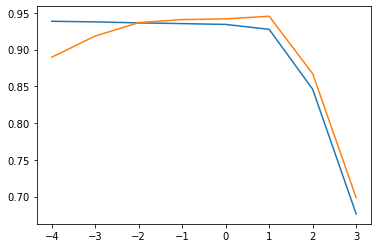

In [176]:
## 규제 강도 조절
train_score = []
test_score = []

alpha_list = [0.0001, 0.001, 0.01, 0.1 , 1, 10, 100, 1000]


for alpha in alpha_list :
    # 릿지모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score) # blue
plt.plot(np.log10(alpha_list), test_score)  # orange

In [178]:
ridge = Ridge(alpha = 0.001)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9377193660680052
0.918547412709071


In [ ]:
'''
정규화 후 규제개념이 적용된 릿지/라쏘 모델에 적용한 후 
차수 조정했을 때의 결정계수와 비교해보았다.

차수를 조정했을 때는 train score = 0.9453, test score = 0.9126
규제 강도를 조절했을 때는 train score = 0.9377, test score = 0.9185

과대적합은 차수 조정했을 경우가 더 크게 나타났지만, 
훈련 결정계수가 더 높게 나타났으므로 차수를 조정한 모델을 예측 모델로 선정
'''